In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading data
df = pd.read_csv("C:/Users/Anna/Desktop/DSI/visualization/02_activities/assignments/data/TMU.csv")

In [4]:
#Previewing data
df.head()

,Institution,Fiscal Year,Study Level,Program Name,HEADCOUNT
0,Metropolitan,2012-2013,Undergraduate,Aerospace Engineering,*
1,Metropolitan,2012-2013,Undergraduate,Architectural Science,309
2,Metropolitan,2012-2013,Undergraduate,Arts Undeclared,*
3,Metropolitan,2012-2013,Undergraduate,Arts and Contemporary Studies,461
4,Metropolitan,2012-2013,Undergraduate,BT Knowledge & Data Mgt. CTPT,0


In [5]:
#Convert a column to a numeric type:
df['HEADCOUNT'] = pd.to_numeric(df['HEADCOUNT'], errors='coerce')
df['HEADCOUNT'] = df['HEADCOUNT'].fillna(0)  # Replace NaN with 0

Show percentages of enrollment comparing the proportion of undergraduate versus graduate to understand the balance between the two study levels

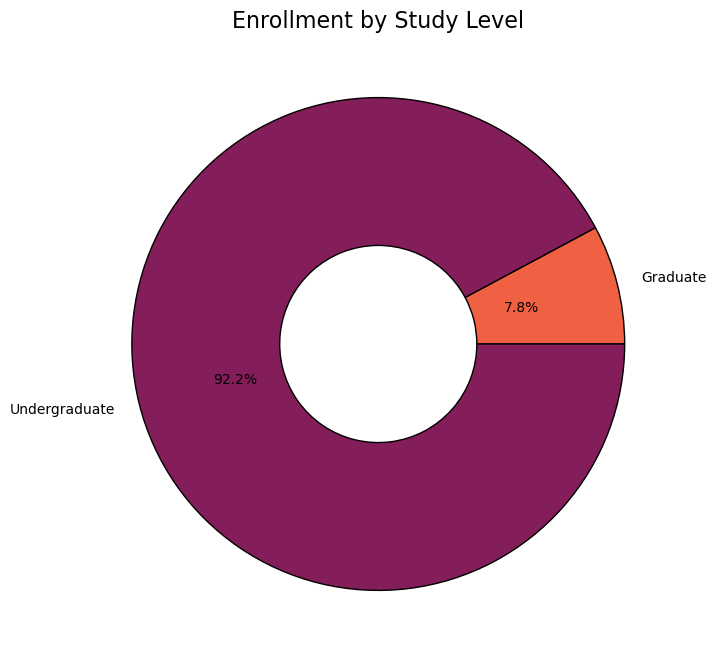

In [16]:
#Display the enrollment data by study level
enrollment_by_study_level = df.groupby('Study Level')['HEADCOUNT'].sum()
colors = sns.color_palette("rocket", len(enrollment_by_study_level))[::-1]
fig, ax = plt.subplots(figsize=(8, 8))
enrollment_by_study_level.plot(kind='pie', autopct='%1.1f%%', colors=colors, wedgeprops={'edgecolor': 'black', 'width': 0.6}, ax=ax)

plt.title('Enrollment by Study Level', fontsize=16)
plt.ylabel('')

plt.show()

Show the list and numbers of undergraduate programs providing insights into the variety of offerings and the number of students enrolled in each

In [7]:
# Display unique programs for the "Undergraduate" study leve
undergraduate_df = df[df['Study Level'] == 'Undergraduate']
unique_programs = undergraduate_df['Program Name'].unique()
print("Unique programs for the 'Undergraduate' study level:")
print(unique_programs)
print(f'\nTotal number of unique programs: {len(unique_programs)}')

Unique programs for the 'Undergraduate' study level:
['Aerospace Engineering' 'Architectural Science' 'Arts Undeclared'
 'Arts and Contemporary Studies' 'BT Knowledge & Data Mgt. CTPT'
 'Bachelor of Arts' 'Bachelor of Engineering' 'Bachelor of Science'
 'Biology' 'Bus. Mgt. Part-Time' 'BusTech Applications Dev. CAAT'
 'Business Management' 'Business Tech Mgt CAAT' 'Business Tech. Mgt. PT'
 'Business Technology Mgt.' 'BusinessTech Mgt CAAT PT'
 'Chemical Engineering Coop' 'Chemistry' 'Child and Youth Care'
 'Civil Engineering' 'Coll. Nursing Centennial'
 'Coll. Nursing George Brown' 'Collaborative Nursing Ryerson'
 'Computer Engineering' 'Computer Science' 'Contemporary Science'
 'Criminal Justice' 'Disability Studies Part-time'
 'Early Childhood Ed CTPT' 'Early Childhood Education'
 'Early Childhood Studies' 'Early Childhood Studies CTPT'
 'Electrical Engineering' 'Fashion Communication' 'Fashion Design'
 'Geographic Analysis' 'Graphic Communications Mgt.'
 'Health Services Management 

Visualize how enrollment in undergraduate programs has evolved over time

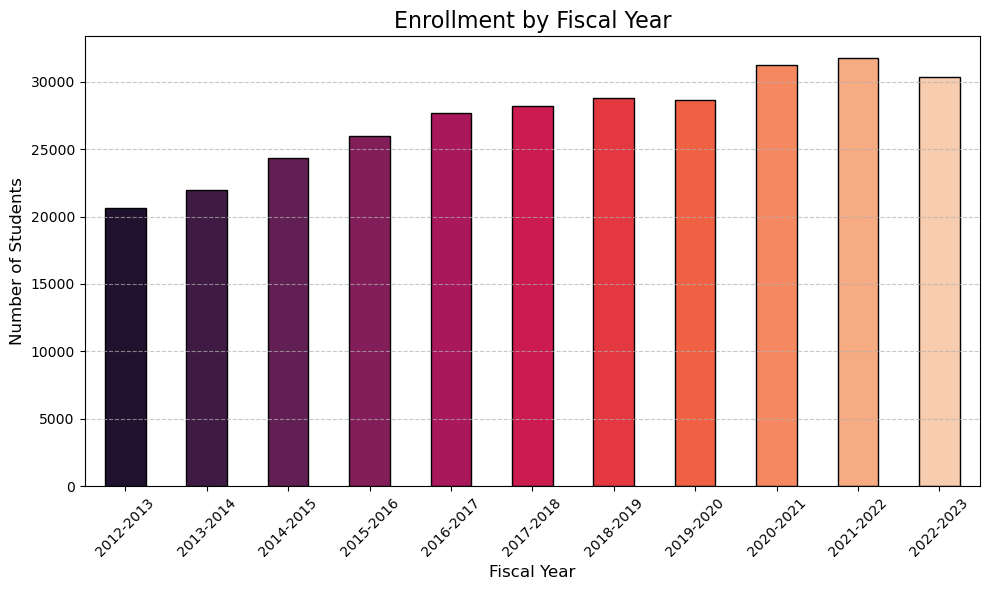

In [8]:
# Filter data for Undergraduate study level
filtered_df = df[df['Study Level'] == 'Undergraduate']
# Group by Fiscal Year and calculate the sum of HEADCOUNT for Undergraduate students
enrollment_by_fiscal_year = filtered_df.groupby('Fiscal Year')['HEADCOUNT'].sum()
# Create a gradient effect using the 'rocket' palette
colors = sns.color_palette("rocket", len(enrollment_by_fiscal_year))
# Plot the data
ax = enrollment_by_fiscal_year.plot(kind='bar', figsize=(10, 6), color=colors, edgecolor='black')
plt.title('Enrollment by Fiscal Year', fontsize=16)
plt.xlabel('Fiscal Year', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Examine enrollment trends for a specific program - Architectural Science to understand any decline or increase over time

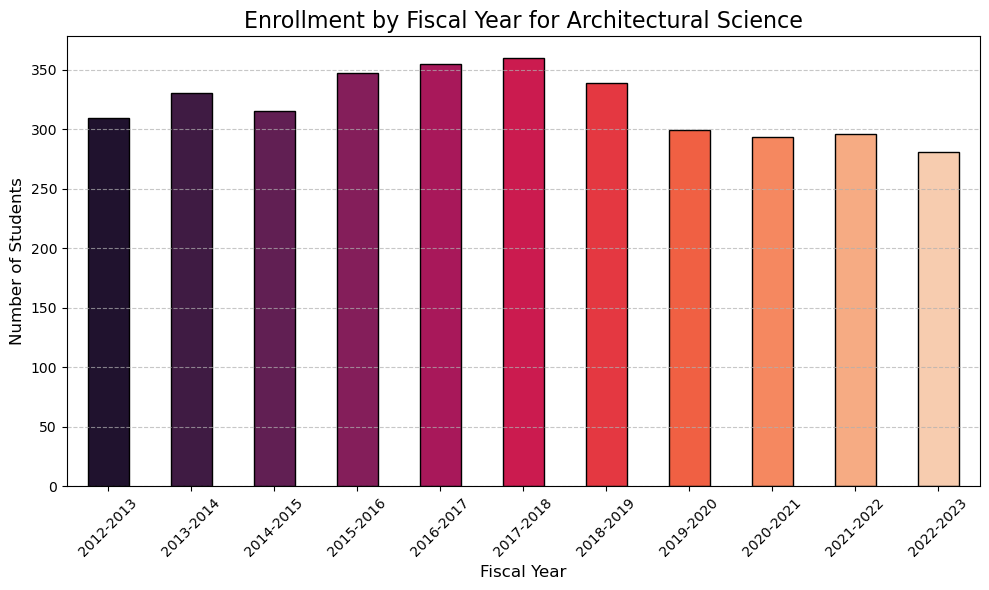

In [9]:
#Plotting the enrollment data for the "Architectural Science" program, grouped by fiscal year
specific_program = "Architectural Science"  
filtered_df = df[df['Program Name'] == specific_program]
enrollment_by_fiscal_year = filtered_df.groupby('Fiscal Year')['HEADCOUNT'].sum()

colors = sns.color_palette("rocket", len(enrollment_by_fiscal_year))
ax = enrollment_by_fiscal_year.plot(kind='bar', figsize=(10, 6), color=colors, edgecolor='black')
plt.title(f'Enrollment by Fiscal Year for {specific_program}', fontsize=16)
plt.xlabel('Fiscal Year', fontsize=12)
plt.ylabel('Number of Students', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Provide a detailed breakdown of enrollment by fiscal year for the "Architectural Science" program and calculate the average enrollment across the years

In [10]:
#Function to count number of students by program and fiscal year
def count_students_by_program(dataset, program, col='Fiscal Year'):
    filtered_data = dataset[dataset['Program Name'] == program]
    enrollment_by_fiscal_year = filtered_data.groupby(col)['HEADCOUNT'].sum()
    # Calculate the average enrollment
    average_enrollment = enrollment_by_fiscal_year.mean()
    output = f"Enrollment in {program} by Fiscal Year"
    return output, enrollment_by_fiscal_year, average_enrollment

#Call the function for "Architectural Science"
program = 'Architectural Science'
enrollment_output, enrollment_data, avg_enrollment = count_students_by_program(df, program)

print(enrollment_output)
print(enrollment_data.to_string())
print(f"Average Enrollment: {int(avg_enrollment)} students per year")

Enrollment in Architectural Science by Fiscal Year
Fiscal Year
2012-2013    309.0
2013-2014    330.0
2014-2015    315.0
2015-2016    347.0
2016-2017    355.0
2017-2018    360.0
2018-2019    339.0
2019-2020    299.0
2020-2021    293.0
2021-2022    296.0
2022-2023    281.0
Average Enrollment: 320 students per year


Identify and visualize the top 50 programs with the highest enrollments in the most recent fiscal year

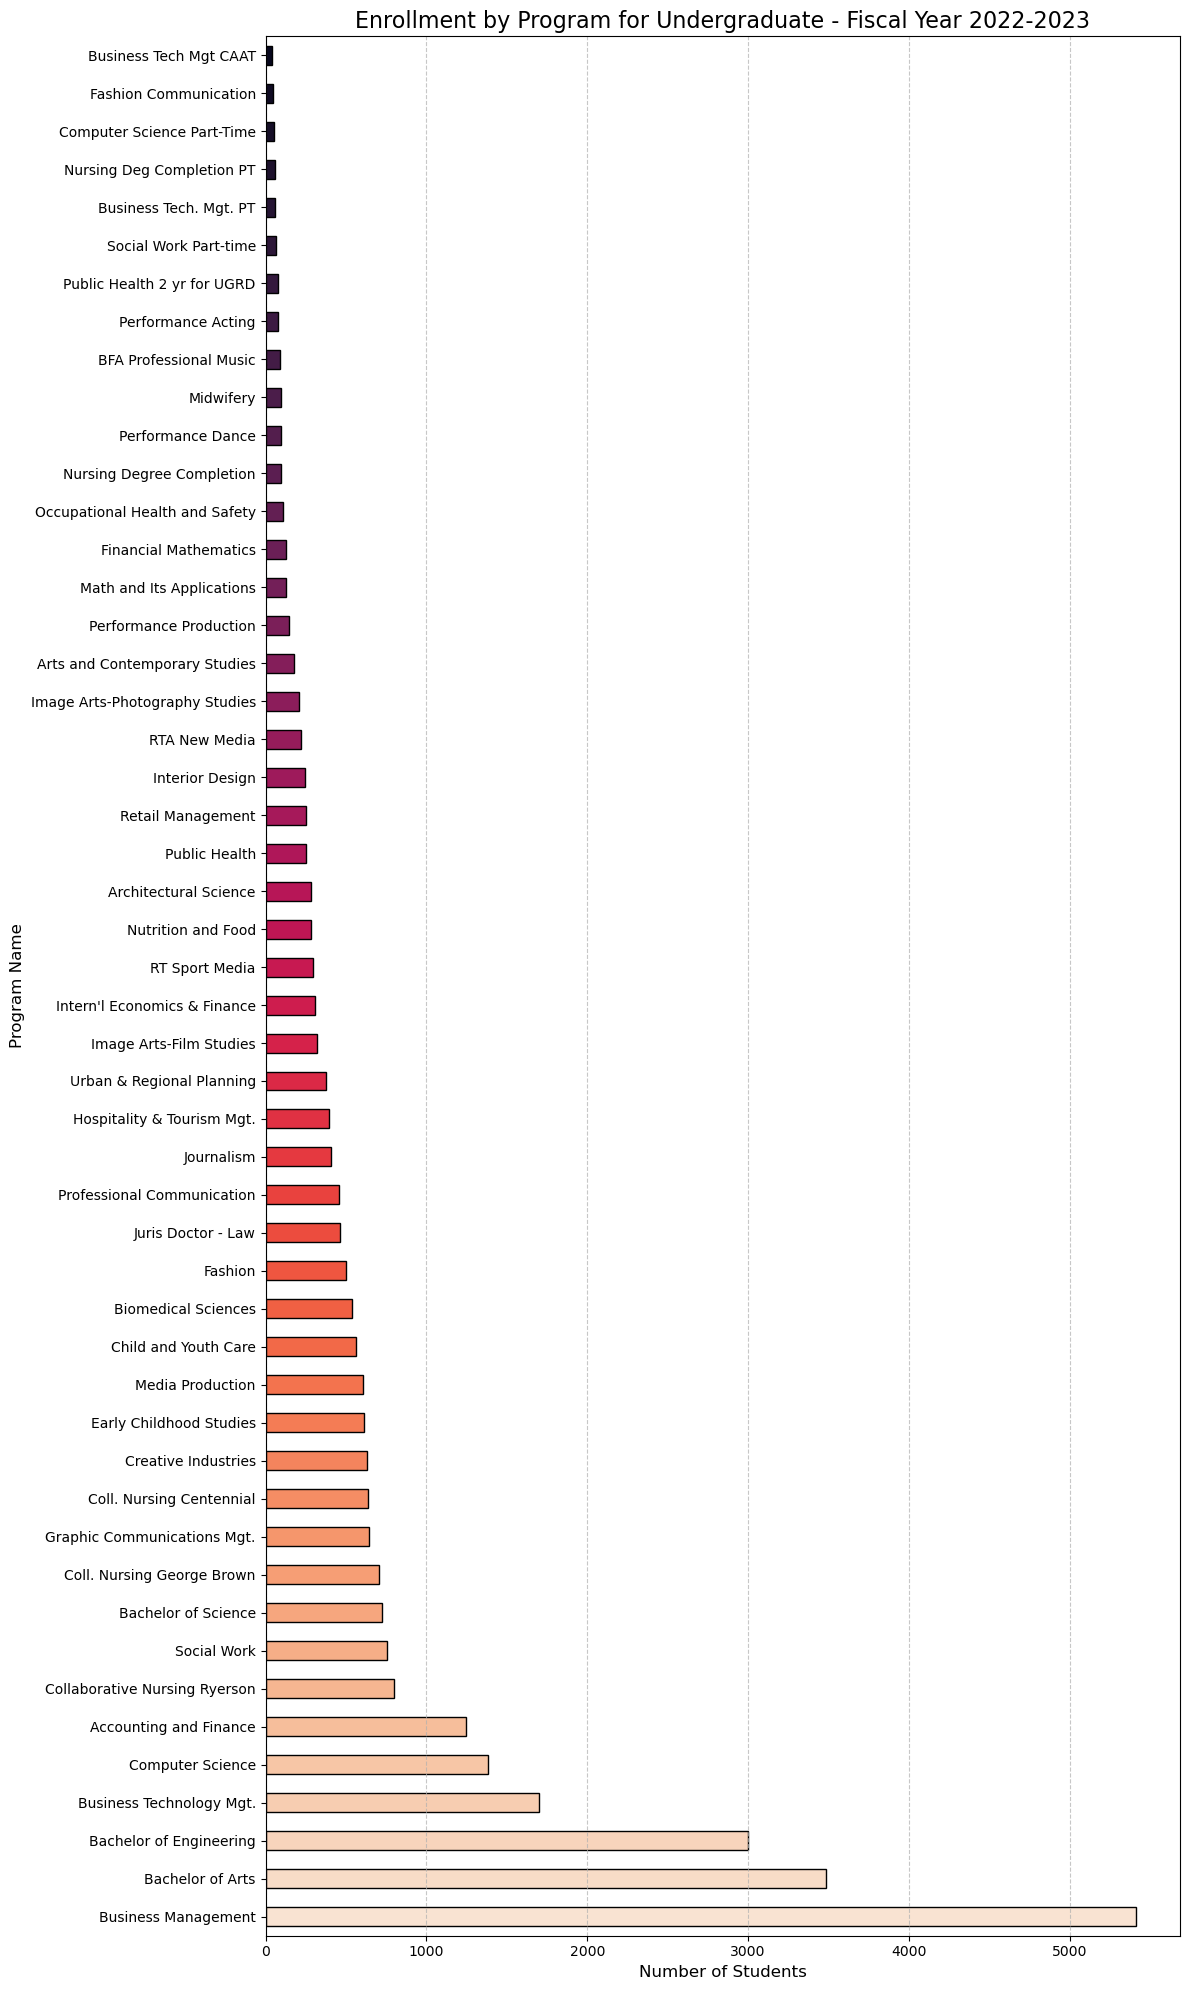

In [11]:
#Display enrollment data for the most recent fiscal year for "Undergraduate" study level
last_fiscal_year = df['Fiscal Year'].max()
filtered_df = df[(df['Study Level'] == 'Undergraduate') & (df['Fiscal Year'] == last_fiscal_year)]

# Group by 'Program Name' and calculate the sum, ort by the number of students
enrollment_by_program = (
    filtered_df.groupby('Program Name')['HEADCOUNT']
    .sum()
    .sort_values(ascending=False))

#Select top 50 programs
enrollment_by_program = enrollment_by_program.head(50)

palette = sns.color_palette('rocket', n_colors=len(enrollment_by_program))[::-1]
plt.figure(figsize=(12, len(enrollment_by_program) * 0.4))  
enrollment_by_program.plot(kind='barh', color=palette, edgecolor='black')
plt.title(f'Enrollment by Program for Undergraduate - Fiscal Year {last_fiscal_year}', fontsize=16)
plt.xlabel('Number of Students', fontsize=12)
plt.ylabel('Program Name', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Compare the enrollment trends of "Architectural Science" with the top most popular programs to observe how its trend compares to the overall enrollment pattern

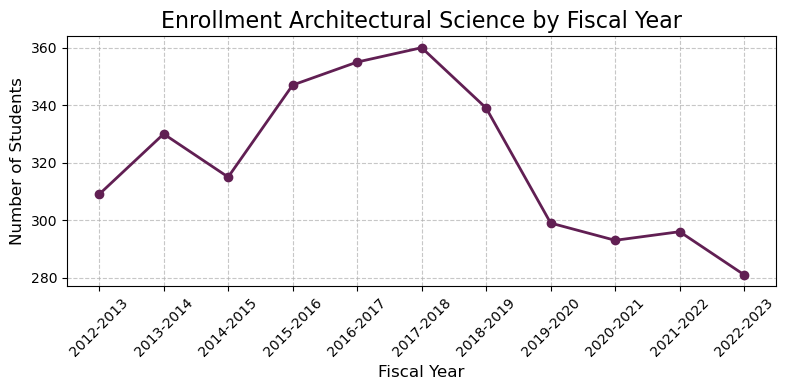

In [15]:
# Define a function to plot a line graph for a specific program
def line_graph(dataset, program, fiscal_column='Fiscal Year', headcount_column='HEADCOUNT', palette='rocket', order=None):
    filtered_data = dataset[dataset['Program Name'] == program]
    # Group by fiscal year and sum the headcount
    grouped_data = filtered_data.groupby(fiscal_column)[headcount_column].sum().reset_index()
      
    colors = sns.color_palette(palette, 3) 
    plt.figure(figsize=(8, 4))  
    plt.plot(grouped_data[fiscal_column], 
            grouped_data[headcount_column], 
            color=colors[0], marker='o', 
            linestyle='-', linewidth=2)
       
    plt.title(f'Enrollment {program} by Fiscal Year', fontsize=16)
    plt.xlabel('Fiscal Year', fontsize=12)
    plt.ylabel('Number of Students', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

program = 'Architectural Science'
line_graph(df, program, palette='rocket')

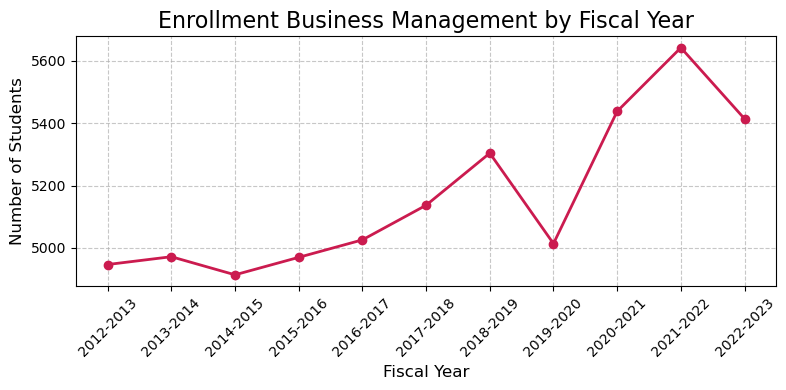

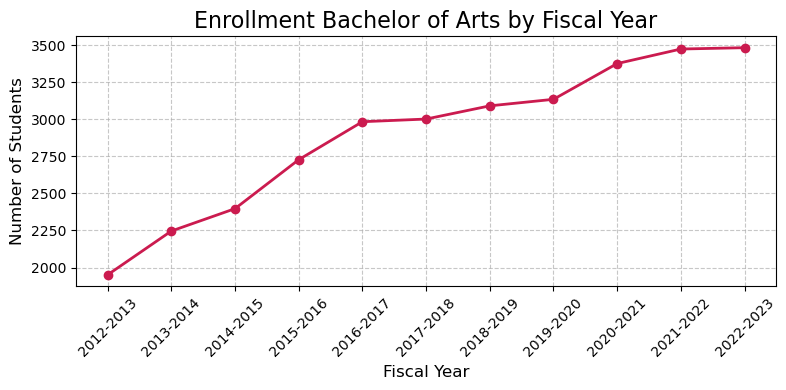

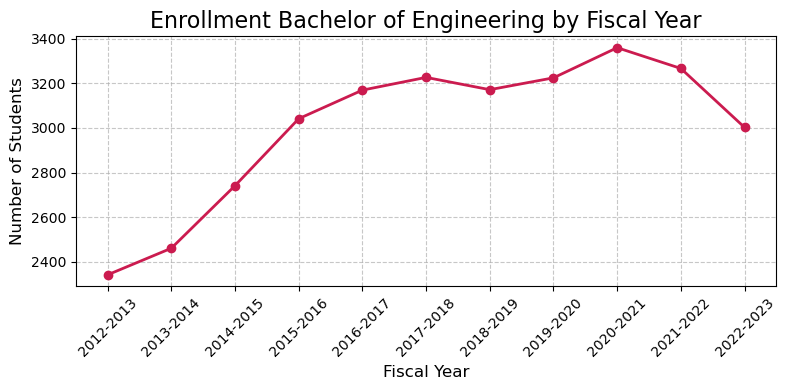

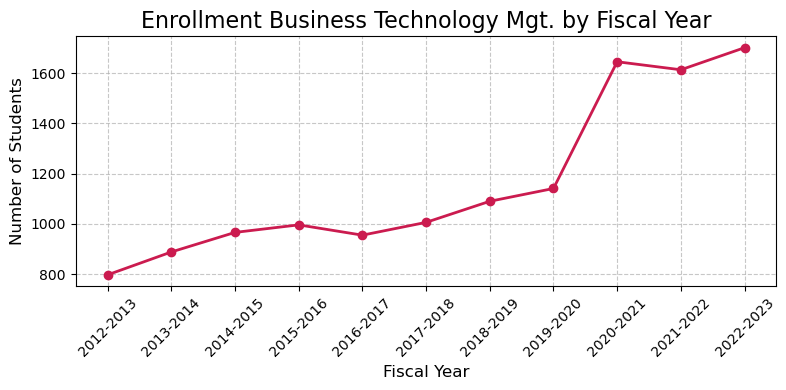

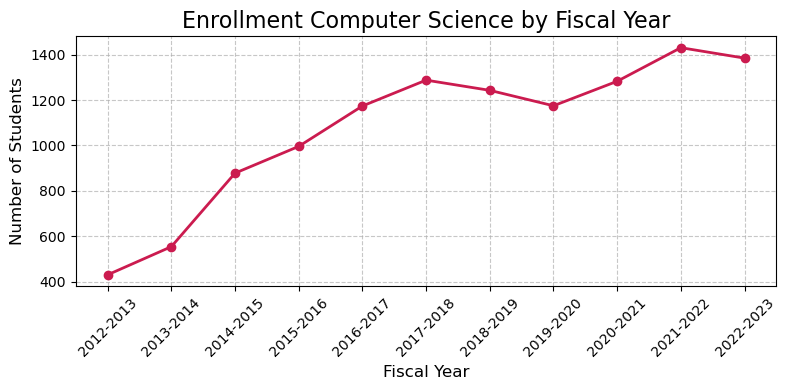

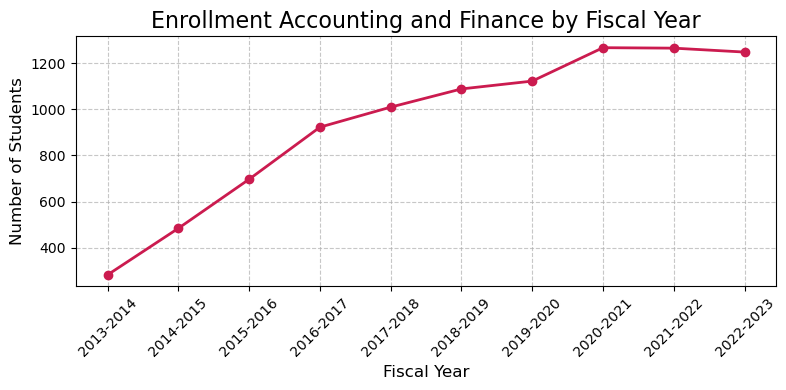

In [14]:
# Define a function to plot line graphs for the top programs
def multiple_line_graphs(programs, dataset, palette='rocket', order=None):
    for program in programs:
        line_graph(dataset, program, palette=palette, order=order)

programs_to_plot = ['Business Management', 'Bachelor of Arts', 
                    'Bachelor of Engineering', 'Business Technology Mgt.', 
                    'Computer Science', 'Accounting and Finance']

multiple_line_graphs(programs_to_plot, df, palette='rocket')
